# Problems

## Problem 1: Basic Binary Classification Neuron

**Task**: *Construct a single neuron to determine if a number is positive or negative. And calculate the output for $x = 2$ and $x = -1$.*

**Hints**: 
- *Inputs*: Single feature, a real number \( x \).
- *Weights and Bias*: Initialize weight \( w = 1.0 \) and bias \( b = 0 \).
- *Activation Function*: Use the sigmoid function to output a probability.

### Solution to Problem 1

We use a binary classification neuron with the sigmoid activation function to classify whether an input  $x$ is positive or negative, producing outputs between $0$ and $1$ to indicate the input’s sign and relative strength.

Here $w=1$ and $b=0$, so using the mathematical model of a neuron, we get:<br>

$
\begin{aligned}
\text{neuron}(x) &= \text{sigmoid}(w \cdot x + b) \\
&= \text{sigmoid}(1 \cdot x + 0) \\
&= \text{sigmoid}(x)\\
&= \frac{1}{1+e^{-x}}
\end{aligned}
$

Now, the main thing we want to construct is a single neuron that can determine if a number is positive or negative.

If we look at the graph of sigmoid function, we see that at $x=0$, it takes the value $\frac{1}{1+e^{-0}}$ which is $\frac{1}{2}$. And we can verify that:

$
\begin{aligned}
x_{1} \leq x_{2}&\Rightarrow  -x_{1} \geq -x_{2}\\
&\Rightarrow  e^{-x_{1}} \geq e^{-x_{2}}\\
&\Rightarrow  1+e^{-x_{1}} \geq 1+e^{-x_{2}}\\
&\Rightarrow \frac{1}{1+e^{-x_{1}}}\leq\frac{1}{1+e^{-x_{2}}}\\
&\Rightarrow \text{sigmoid}(x_{1})\leq\text{sigmoid}(x_{2})
\end{aligned}
$

This shows that $\text{sigmoid}(x)$ is monotonically increasing function and, thus, <br>
- $\frac{1}{2}\leq \text{sigmoid}(x) \leq 1$ if $x$ is positive and,<br>
- $0\leq \text{sigmoid}(x) \leq \frac{1}{2}$ if $x$ is negative.

I can now say that, the output of $x=2$ lies in the interval $\left(\frac{1}{2},1\right)$
And the output of $x=-1$ lies in the interval $\left(0,\frac{1}{2}\right)$.

In conclusion, this binary classification neuron effectively uses the sigmoid function to distinguish between positive and negative inputs. By mapping input values to a smooth, continuous range between $0$ and $1$, the neuron provides an intuitive output that reflects both the direction and magnitude of the input. Positive inputs yield outputs above  $\frac{1}{2}$, approaching $1$ as they increase, while negative inputs yield outputs below  $\frac{1}{2}$, approaching $0$ as they decrease. This not only indicates the sign of the input but also shows how strongly positive or negative the value is. This simple yet powerful model showcases how the sigmoid function’s properties make it ideal for binary classification tasks, providing insights into the nature of the input based on the output range.

We can also get the exact values using the code snippet given below.

Output for x = 2 is  0.8807970779778823
Output for x = -1 is  0.2689414213699951


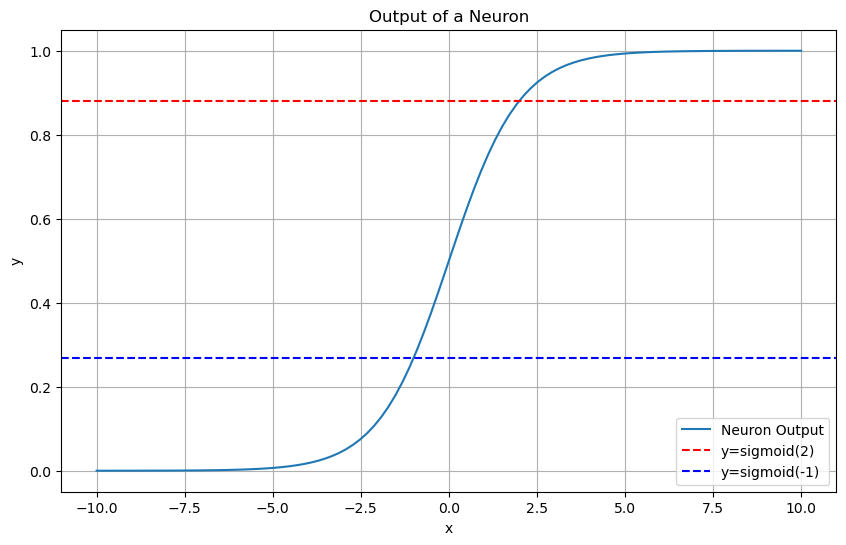

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#Print the output of the neuron for x=2 and x=-1
print(f"Output for x = 2 is ", sigmoid(2))
print(f"Output for x = -1 is ", sigmoid(-1))   

#Plot the output of the neuron for different values of x
plt.figure(figsize=(10,6))
x = np.linspace(-10, 10, 100)
y = sigmoid(x)
plt.plot(x, y, label='Neuron Output')
plt.axhline(y=sigmoid(2), color='r', linestyle='--', label="y=sigmoid(2)")  
plt.axhline(y=sigmoid(-1), color='b', linestyle='--', label="y=sigmoid(-1)")  
plt.xlabel('x')
plt.ylabel('y')
plt.title('Output of a Neuron')
plt.legend()
plt.grid()
plt.show()

## Problem 2: Comparing Activation Functions with a Pattern Analysis

**Task**: *Investigate how three different activation functions respond to a range of inputs, simulating the behavior of neurons as light bulbs controlled by smart switches*

*Note*: This exercise aims to vividly illustrate how different neural "control mechanisms" (activation functions) interpret and respond to the same range of inputs by varying the simulated "light intensity" of neurons. The comparison should help deduce patterns and understand the suitability of each function for different types of tasks in neural networks.

**Hints**:
- *Setup*:
  - *Inputs*: Use a series of inputs ranging from -2.0 to 2.0 in increments of 0.5 to simulate varying electrical currents.
  - *Weights and Bias*: Assume a weight \( w = 1.0 \) and a bias \( b = 0.5 \), which together determine the net input to the neuron.

- *Activation Functions*: Analyze the outputs using sigmoid, tanh, and ReLU functions.
  - *Sigmoid Function*: Simulates a precise dimmer switch that controls the brightness subtly, preventing the light from ever being fully off or fully bright, but adjusting smoothly.
  - *Tanh Function*: Acts like a dimmer that can also go negative (dim to dark), representing zero output as complete darkness.
  - *ReLU Function*: Represents a simple on/off switch, turning the light on only if the input (after weight and bias adjustment) is positive.

- *Task*:
  - *Calculation*: For each input in the series, calculate the output using each of the three activation functions.
  - *Visualization*: Plot the resulting outputs for each activation function on the same graph to visually compare how the light bulb's brightness changes across the input range.
  - *Discussion*: Interpret the plots to describe how each activation function would control the "firing" of a neuron (light bulb). Discuss the practical implications of these differences in handling signals in a neural network.

### Solution to Problem 2

In this code, we explore the behavior of a single neuron under three different activation functions: Sigmoid, ReLU, and Tanh. We generate input values ranging from -2 to 2 and apply a weight of  w = 1  and a bias of  b = 0.5  to compute the neuron’s weighted sum. We then pass these values through the respective activation functions to observe how each activation function processes the same input in distinct ways. The outputs are rounded for easier interpretation and plotted to visualize the differences between these functions.

[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
[0.18 0.27 0.38 0.5  0.62 0.73 0.82 0.88 0.92]
[0.  0.  0.  0.  0.5 1.  1.5 2.  2.5]
[-0.91 -0.76 -0.46  0.    0.46  0.76  0.91  0.96  0.99]


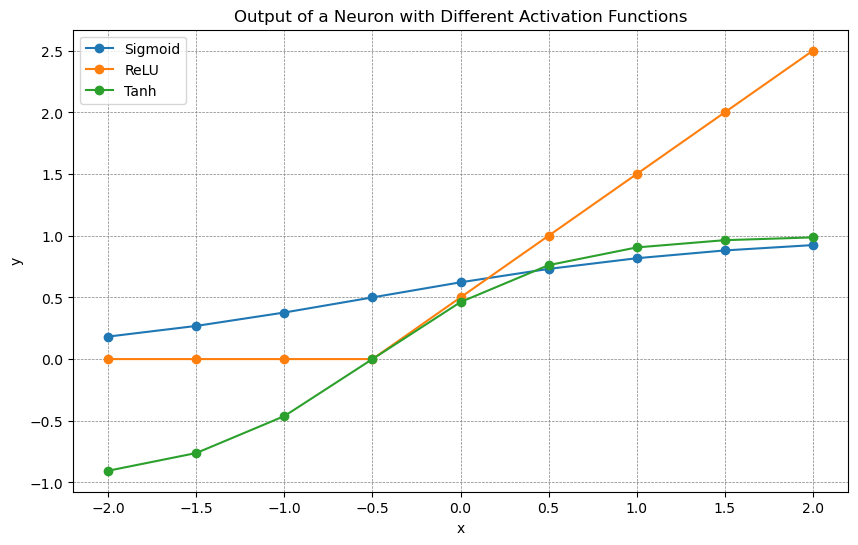

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Generate values from -2 to 2 with increments of 0.5
x_values = np.arange(-2, 2.5, 0.5)  # Note: 2.5 ensures the value 2 is included

print(x_values)

# Specify the weights and bias
w = 1
b= 0.5

# Compute the weighted sum of x and w
y = w*x_values + b

#Define the activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Compute the output of the neuron for different activation functions
y_sigmoid = sigmoid(y)
y_relu = relu(y)
y_tanh = tanh(y)

# Assuming y_sigmoid, y_relu, and y_tanh are numpy arrays
y_sigmoid_rounded = np.round(y_sigmoid, 2)
y_relu_rounded = np.round(y_relu, 2)
y_tanh_rounded = np.round(y_tanh, 2)
print(y_sigmoid_rounded)
print(y_relu_rounded)
print(y_tanh_rounded)

# Plot the output of the neuron for different activation functions

plt.figure(figsize=(10,6))
plt.plot(x_values, y_sigmoid, label='Sigmoid', marker='o')
plt.plot(x_values, y_relu, label='ReLU', marker='o')
plt.plot(x_values, y_tanh, label='Tanh', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Output of a Neuron with Different Activation Functions')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5) 
plt.show()

| **Activation Function** | **Behavior for Positive Inputs**         | **Behavior for Negative Inputs**         | **Firing Analogy**                                     | **Practical Implications**                                                                                                                                 |
|-------------------------|------------------------------------------|------------------------------------------|--------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Sigmoid**              | Smoothly increases towards 1 as input increases.  | Approaches 0 as input becomes more negative.           | Acts like a dimmer switch: small inputs keep the light dim, large positive inputs brighten the light. | Great for binary classification but suffers from vanishing gradient problems in deep networks. Outputs values between 0 and 1, making it ideal for probabilities. |
| **ReLU**                 | Increases linearly without an upper bound for positive inputs. | Outputs 0 for all negative inputs.                    | Acts like an on/off switch: negative inputs keep the light off, and positive inputs brighten it linearly. | Preferred for deep neural networks due to its simplicity and efficiency. Can lead to dead neurons when inputs remain negative, resulting in no activation.         |
| **Tanh**                 | Approaches 1 for large positive inputs.            | Approaches -1 for large negative inputs.                | Functions like a more balanced dimmer switch: output can range from full brightness (1) to total darkness (-1). | Useful for outputs that need to be centered around 0. Can handle both positive and negative signals but suffers from vanishing gradients in deeper networks.       |

## Problem 3: Output Behavior for Different Inputs
**Task**:  *Model a neuron that predicts whether an object's size is above or below a threshold.*

**Hints**:
* *Inputs*: Single feature representing size (e.g., $ x = 10 $). Let this determine the threshold.

* *Weights and Bias*: Assume $ w = 0.1$ and $ b = -1 $.

* *Activation Function*: Use the sigmoid function to model the output.

* *Task*: Describe how the output of the neuron changes as the size value varies from 5 to 15.

### Solution:3

This problem is similar to a binary classification for varying inputs. So, we will construct a single neuron with sigmoid activation function.

We will model a neuron that predicts whether an object’s size is above or below a threshold, with the threshold point set at $x = 10$ . The neuron will use a weighted sum of the input size with a weight $ w = 0.1$  and bias  $b = -1$ , which is then passed through the sigmoid activation function. The monotonically increasing sigmoid function will increase with increasing input and decrease with decreasing input, helping us determine if the size is above or below the threshold. Specifically, if the output is greater than or equal to $0.5$ (Value at $x=10$), the size is considered above the threshold; otherwise, it is considered below the threshold. By varying the size input from $5 to 15, we can observe how the output changes relative to the threshold at  x = 10 .

In [62]:
import numpy as np

# Generate values from 5 to 15 with increments of 1
x_values = np.arange(5, 16, 1)

# Specify the weights and bias
w = 0.1
b = -1

# Compute the weighted sum of x and w
y= w*x_values + b

# Define the activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Compute the output of the neuron
y_sigmoid = sigmoid(y)

def model(x):
    y = w*x + b
    neuron_output = sigmoid(y)
    if  neuron_output  >= 0.5:
        model_output = "Above threshold."
    else:
        model_output ="Below threshold."
    return neuron_output, model_output


# Test the output of the neuron for x_values
for x in x_values:
    output, classification = neuron(x)
    print(f"For x = {x}: Neuron Output = {output:.2f}, Classification = {classification}")

For x = 5: Neuron Output = 0.38, Classification = Below threshold.
For x = 6: Neuron Output = 0.40, Classification = Below threshold.
For x = 7: Neuron Output = 0.43, Classification = Below threshold.
For x = 8: Neuron Output = 0.45, Classification = Below threshold.
For x = 9: Neuron Output = 0.48, Classification = Below threshold.
For x = 10: Neuron Output = 0.50, Classification = Above threshold.
For x = 11: Neuron Output = 0.52, Classification = Above threshold.
For x = 12: Neuron Output = 0.55, Classification = Above threshold.
For x = 13: Neuron Output = 0.57, Classification = Above threshold.
For x = 14: Neuron Output = 0.60, Classification = Above threshold.
For x = 15: Neuron Output = 0.62, Classification = Above threshold.


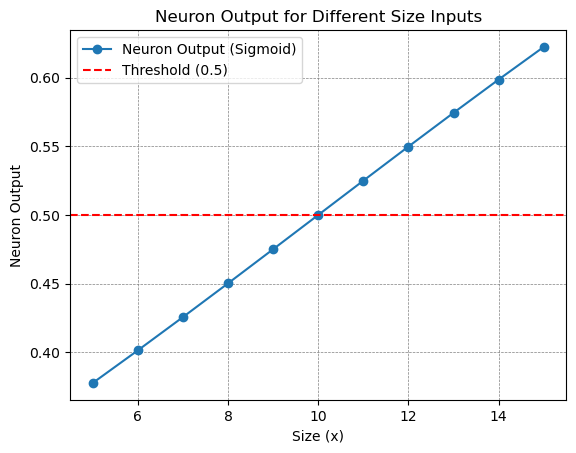

In [63]:
# Plotting the neuron output for x_values
import matplotlib.pyplot as plt

# Generate neuron outputs for the range of x_values
neuron_outputs = [model(x)[0] for x in x_values]

# Plot the neuron output as x varies
plt.plot(x_values, neuron_outputs, label='Neuron Output (Sigmoid)', marker='o')
plt.axhline(y=0.5, color='r', linestyle='--', label='Threshold (0.5)')
plt.xlabel('Size (x)')
plt.ylabel('Neuron Output')
plt.title('Neuron Output for Different Size Inputs')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5) 
plt.show()

## Problem 4: Impact of Bias in Activation
**Task**: *Explore the impact of varying the bias on a neuron's output with a fixed input.*

**Hints**:
* *Inputs*: Assume $x = 2.0 $.

* *Weights and Bias*: Use $ w = 1.5 $ and experiment with different bias values $ b = -1, 0, 1 $.

* *Activation Function*: Use the ReLU function.

* *Task*: Calculate and compare the outputs for each bias setting, discussing the role of bias in modulating the neuron's activation.

### Solution 4:

In this problem, we investigate the impact of varying the bias on a neuron’s output, while keeping the input and weight fixed. The neuron uses a ReLU (Rectified Linear Unit) activation function, which outputs zero for negative values and passes positive values as they are. The fixed input is  x = 2.0 , and the weight is  w = 1.5 . By experimenting with different bias values  b = [-7, -6, -1, 0, 1, 6, 7] , we explore how the bias influences the neuron’s ability to activate (produce a non-zero output) and how the neuron’s output varies. This helps us understand how bias can shift the threshold of activation, either suppressing or enhancing the output of the neuron in response to the same input.

[ 0.  0.  2.  3.  4.  8. 10.]


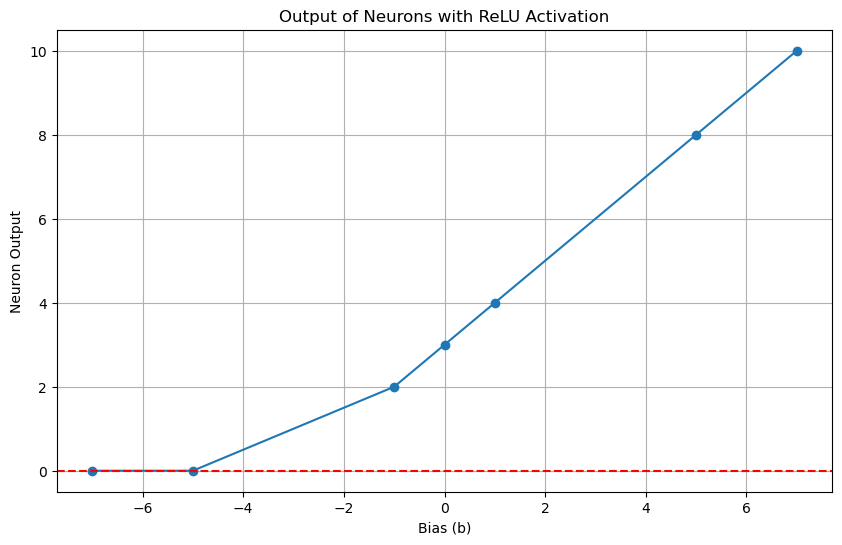

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Keep the input fixed at x = 2
x = 2

# Define the weights and biases for the neurons
w = 1.5 
b = np.array([-7, -5, -1, 0, 1, 5, 7])

# Compute the weighted sum of x and w
y = w*x + b

# Define the activation function
def relu(x):
    return np.maximum(0, x)

# Compute the output of the neurons
y_relu = relu(y)
print(y_relu)

# Plot the output of the neurons
plt.figure(figsize=(10,6))
plt.plot(b, y_relu, marker='o')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Bias (b)')
plt.ylabel('Neuron Output')
plt.title('Output of Neurons with ReLU Activation')
plt.grid()
plt.show()


The bias shifts the activation threshold of the neuron. A positive bias increases the neuron’s output, making it easier for the neuron to activate and produce larger outputs. A negative bias lowers the neuron’s output, making it harder for the neuron to activate, potentially reducing it to zero in extreme cases. A zero bias leaves the output directly dependent on the input without any adjustment.